# Clustering, dimensionality reduction

## Part 1: Preprocessing¶

1 - Load the Mnist dataset using [keras.datasets](https://keras.io/api/datasets/)  on train_X, train_y, test_X, and test_y datasets. Then print the type and the shape of each dataset

2 - Concatenate the train_X and test_X data into a variable named data. Then, train_y and test_y into a true_labels. Verify that the shape of data and true_labels are correct. You can use [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

3- Define a function named ```visualize(k, partition)``` that takes three parameters: a  ```partition``` and shows $5$ random images of cluster ```k``` defined by the given partition. Test your function using the ground truth as a partition.

4- Normalize the data to make them between $[0,1]$. Then vectorize the data. What is the new shape ?  

### Part 2: Dimensionality reduction and clustering

5- Apply a [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (PCA) to reduce the dimension to $d=2$. What is the cumulative explained variance?

6- Visualize the projected data and assign one color to each cluster.

7- Same question as 5 and 6 with $d=3$. Comment the result

8- Perform a different [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) with different number of clusters $k\in\{5, 10, 15, 20\}$. Compute the [ARI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html), [NMI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) scores, and runtime for each run. Visualize the results.

9- Perform a different Kmeans with projection spaces with different dimension. Compute the ARI, NMI scores, cumulative explained variance, and runtime for each run. Visualize the results.

## Response

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score ,normalized_mutual_info_score
from keras.datasets import mnist
from sklearn.model_selection import GridSearchCV
import random,time


### 1-Load Mnist dataset

In [116]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [117]:
datasets = [x_train, y_train, x_test, y_test]
datasets_str = [ 'x_train', 'y_train','x_test', 'y_test']
for dataset, dataset_str in zip(datasets, datasets_str):
    print(f'{dataset_str} est de type {type(dataset)} et de taille {dataset.shape}')

x_train est de type <class 'numpy.ndarray'> et de taille (60000, 28, 28)
y_train est de type <class 'numpy.ndarray'> et de taille (60000,)
x_test est de type <class 'numpy.ndarray'> et de taille (10000, 28, 28)
y_test est de type <class 'numpy.ndarray'> et de taille (10000,)


### 2-Concatenation of $ x \_ train  $ and $ x\_test $ ,$ y\_train$ and $y\_test $

In [118]:
data = np.vstack([x_train, x_test])
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

true_labels = np.vstack([y_train, y_test])

# Shape verification

print(f"the shape of the data is {data.shape} and the shape of the labels is {true_labels.shape}")


the shape of the data is (70000, 28, 28) and the shape of the labels is (70000, 1)


In [119]:
data.shape

(70000, 28, 28)

### 3- Visualize function

In [120]:
def visualize(k, partition):
    index = np.where(partition == k)[0]
    if index.size == 0:
        print(f"No images found for label {k}.")
        return

    chosen = np.random.choice(index, size=min(5, index.size), replace=False)

    for i,j in zip(chosen,[0,1,2,3,4]):
        plt.figure(figsize=(2, 2))
        plt.subplot(2,3,j+1)
        plt.imshow(data[i], cmap='gray')
        plt.title(f"Label {k} — index {i}")
        plt.axis('off')
        plt.show()


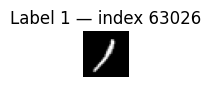

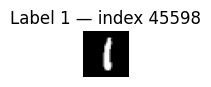

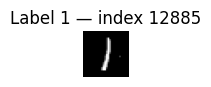

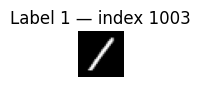

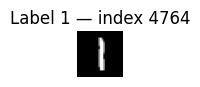

In [121]:
visualize(1, true_labels)

### Normalization of the data

In [60]:
# answer

data = (data - data.min()) / (data.max() - data.min())


#### Vectorization

In [124]:
data = data.reshape(data.shape[0], -1)

#### The new shape of data

In [62]:
print(f'The new shape of the data is {data.shape}')

The new shape of the data is (70000, 784)


## Dimensionality reduction and clustering

### 5 -Principal Component Analysis (PCA)

In [63]:

pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

#### Cumulative explained variance

In [64]:
variance = pca.explained_variance_ratio_
print(f"Variance explained by the first two components: {variance}")


Variance explained by the first two components: [0.09746116 0.07155445]


### 6 - Visualisation of the projection of the data 

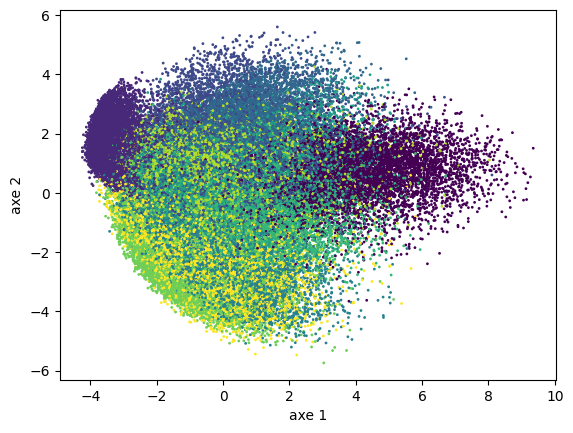

In [65]:
axes = pca.transform(data)
plt.scatter(axes[:, 0], axes[:, 1], c=true_labels,cmap='viridis', s=1)
plt.xlabel('axe 1')
plt.ylabel('axe 2')
plt.show()

### 7-With d = 3

In [66]:
pca_3 = PCA(n_components=3)
axe_3 = pca_3.fit_transform(data)

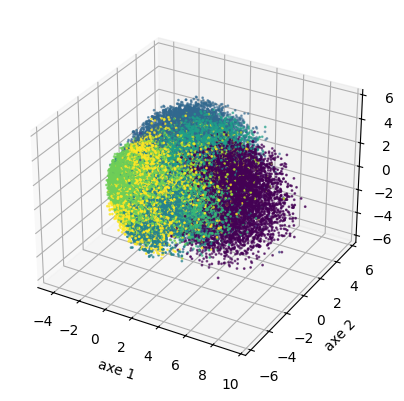

In [67]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(axe_3[: ,0], axe_3[: ,1], axe_3[: ,2], c=true_labels, cmap='viridis', s=1)
ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
ax.set_zlabel('axe 3')
plt.show()

In [68]:
comp = pd.DataFrame(
    {
        "Dimenstion" : [1, 2, 3],
        "valeur propre" : pca_3.explained_variance_,
        "% de variance" : np.round(pca_3.explained_variance_ratio_ * 100),
        "cumul" : np.round(np.cumsum(pca_3.explained_variance_ratio_), 2)*100
    }
)

In [69]:
comp

,Dimenstion,valeur propre,% de variance,cumul
0,1,5.141008,10.0,10.0
1,2,3.774447,7.0,17.0
2,3,3.243835,6.0,23.0


##### Comment:
After this information in ``comp``   we can say that the three axis that we choice contain only 23% of informations ,that mean we lose 77% of informations.

### Kmeans cluster

In [70]:
n_clusters = [5,10,15,20]
for n in n_clusters:
    clustering = KMeans(n_clusters=n)
    clustering.fit(data)
    y_pred = clustering.predict(data)
    ari = adjusted_rand_score(true_labels.reshape(-1), y_pred)
    nmi = normalized_mutual_info_score(true_labels.reshape(-1), y_pred)

    print(f'le score ARI est de {ari}  et le score NMI est de {nmi} pour {n} clusters')

le score ARI est de 0.33055592014330304  et le score NMI est de 0.46554205561223594 pour 5 clusters
le score ARI est de 0.4079733531826307  et le score NMI est de 0.521096326667924 pour 10 clusters
le score ARI est de 0.37338328292595074  et le score NMI est de 0.5277064136581322 pour 15 clusters
le score ARI est de 0.34285439658717665  et le score NMI est de 0.5344014361322916 pour 20 clusters


In [71]:
cluster = KMeans(n_clusters=10, random_state=0 , max_iter=1000 ,algorithm= 'elkan')

In [72]:
cluster.fit(data)
y_pred = cluster.predict(data)
ari = adjusted_rand_score(true_labels.reshape(-1), y_pred)
nmi = normalized_mutual_info_score(true_labels.reshape(-1), y_pred)
print(f'le score ARI est de {ari}  et le score NMI est de {nmi} pour 10 clusters')


le score ARI est de 0.36090407428241056  et le score NMI est de 0.4913680523682495 pour 10 clusters


In [73]:
cluster.transform(data)[0]

array([8.21031511, 7.95776657, 8.11569258, 7.94585716, 8.33298137,
       7.34038525, 6.74585015, 9.07593092, 7.95100141, 8.39453105])

In [74]:
def prediction(data,model,true_labels,cluster ,k):
    y_pred = model.predict(data)
    df = pd.DataFrame(data)
    df['prediction'] = 0
    pred_list = []
    for i in range(10):
        indices_cluster = np.where(y_pred == i)[0]
        X_cluster = data[indices_cluster]
        y_cluster = true_labels[indices_cluster]
        pred_value = np.argmax(np.bincount(list(y_cluster.reshape(-1))))
        if int(pred_value) in pred_list:
            y_cluster_tmp = np.delete(y_cluster, np.where(y_cluster == pred_value))
            pred_value = np.argmax(np.bincount(list(y_cluster_tmp.reshape(-1))))
        pred_list.append(int(pred_value))
        df.loc[indices_cluster,'prediction'] = pred_value
    print(pred_list)
    for i in range(k):
        plt.subplot(2, k, i+1)
        x_data_i = df[df['prediction'] == cluster].drop(columns=['prediction'])
        x_data_i = x_data_i.to_numpy()
        # print(x_data_i)
        plt.imshow(x_data_i[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"{k} exemples du cluster {cluster}")
    plt.show()
   

[2, 1, 6, 7, 4, 3, 8, 0, 5, 5]


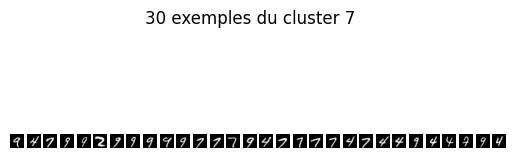

In [75]:
prediction(data,cluster,true_labels,7,30)

In [76]:
clusterings = KMeans(n_clusters=10, random_state=0 , max_iter=1000 ,algorithm= 'elkan')
clusterings.fit(data)


KMeans(algorithm='elkan', max_iter=1000, n_clusters=10, random_state=0)

In [77]:
df = pd.DataFrame(data= data)

In [78]:
clustering_predict = clusterings.predict(data)

In [79]:
df['prediction'] = clustering_predict

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [81]:
df.groupby(['prediction']).max().round(0)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
prediction,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


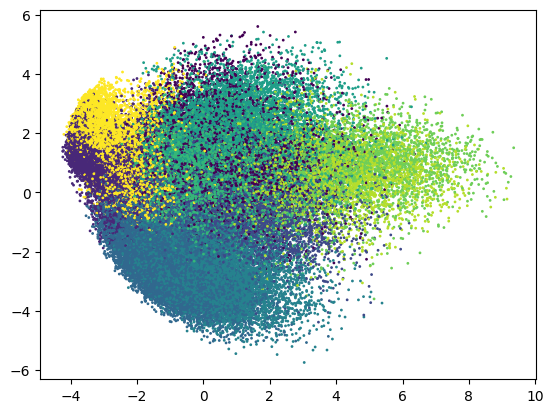

In [82]:
pca_ = PCA(n_components=2)
axe_2 = pca_.fit_transform(data)
plt.scatter(axe_2[:, 0], axe_2[:, 1], c=clustering_predict, cmap='viridis', s=1)

In [83]:
pca.components_.shape

(2, 784)

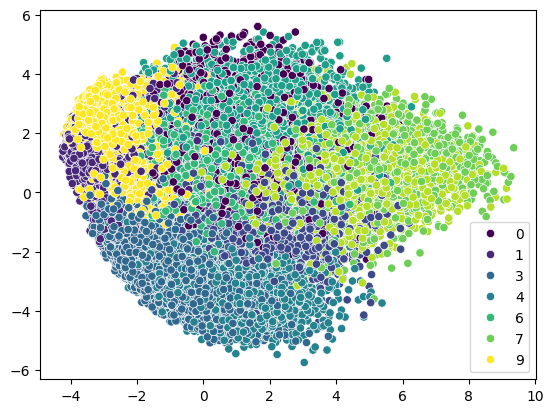

In [84]:
sns.scatterplot(x=axe_2[:, 0], y=axe_2[:, 1], hue=clustering_predict, palette='viridis', alpha=1)
plt.show()

In [85]:
pca_ = PCA()
X_project = pca_.fit_transform(data)

In [94]:
comp = pd.DataFrame(
    {
        "Dimenstion" : [x for x in range(1, X_project.shape[1] + 1)],
        "valeur propre" : pca_.explained_variance_,
        "% de variance" : np.round(pca_.explained_variance_ratio_ * 100),
        "cumul" : np.round(np.cumsum(pca_.explained_variance_ratio_), 2)*100
    }
)

In [98]:
comp[comp['cumul'] <= 90]

,Dimenstion,valeur propre,% de variance,cumul
0,1,5.141008,10.0,10.0
1,2,3.774447,7.0,17.0
2,3,3.243835,6.0,23.0
3,4,2.850248,5.0,28.0
4,5,2.578878,5.0,33.0
...,...,...,...,...
85,86,0.069573,0.0,90.0
86,87,0.068151,0.0,90.0
87,88,0.066027,0.0,90.0
88,89,0.064633,0.0,90.0


In [107]:
pca_90 = PCA(n_components=90)
X_project = pca_90.fit_transform(data)

In [126]:
pca_90.explained_variance_

array([5.14100825, 3.77444717, 3.24383475, 2.85024769, 2.57887847,
       2.27097726, 1.72926011, 1.52426579, 1.4550179 , 1.23546262,
       1.11126353, 1.07479514, 0.90046453, 0.89358363, 0.8352231 ,
       0.78403658, 0.69595241, 0.67467111, 0.62627797, 0.60816608,
       0.56232856, 0.53265948, 0.50594559, 0.47982617, 0.46592764,
       0.44247076, 0.42718063, 0.41446072, 0.39048317, 0.36397766,
       0.34611138, 0.34048108, 0.316928  , 0.30890612, 0.29895855,
       0.28667699, 0.26623474, 0.256931  , 0.2526455 , 0.24665239,
       0.23967629, 0.23469115, 0.22060634, 0.2089737 , 0.20240316,
       0.19822387, 0.19064985, 0.18410804, 0.17867856, 0.1686375 ,
       0.16713829, 0.16359928, 0.15639132, 0.15144401, 0.14902406,
       0.1421186 , 0.14157507, 0.13530689, 0.13354428, 0.12905013,
       0.12644126, 0.12584982, 0.12091921, 0.11654905, 0.11238792,
       0.10883103, 0.10696576, 0.10287967, 0.10099942, 0.09945855,
       0.09862861, 0.09500374, 0.09325394, 0.09144548, 0.08695

In [108]:
cluster_90 = KMeans(n_clusters=10)
cluster_90.fit(X_project)
y_pred_90 = cluster_90.predict(X_project)
ari_90 = adjusted_rand_score(true_labels.reshape(-1), y_pred_90)
nmi_90 = normalized_mutual_info_score(true_labels.reshape(-1), y_pred_90)
print(f'le score ARI est de {ari_90}  et le score NMI est de {nmi_90} pour 10 clusters')

le score ARI est de 0.32027623628552493  et le score NMI est de 0.45402592812743126 pour 10 clusters


In [103]:
pca_10 = PCA(n_components=10)
X_project = pca_10.fit_transform(data)
cluster_10 = KMeans(n_clusters=10)
cluster_10.fit(X_project)
y_pred_10 = cluster_10.predict(X_project)
ari_10 = adjusted_rand_score(true_labels.reshape(-1), y_pred_10)
nmi_10 = normalized_mutual_info_score(true_labels.reshape(-1), y_pred_10)
print(f'le score ARI est de {ari_10}  et le score NMI est de {nmi_10} pour 10 clusters')

le score ARI est de 0.36501258453093405  et le score NMI est de 0.4823722847511091 pour 10 clusters


In [ ]:

def kmeans_project(list_k, list_dim, data, true_labels):
    """
    For each k in list_k and each dim in list_dim:
      • do PCA to 'dim' dims
      • record cumulative explained variance
      • run KMeans with 'k' clusters
      • record ARI, NMI, PCA time, KMeans time
    Returns a DataFrame with one row per (k,dim).
    """
    records = []
    for k in list_k:
        for dim in list_dim:
            # 1) PCA + timing
            pca = PCA(n_components=dim, random_state=42)
            t0 = time.time()
            X_proj = pca.fit_transform(data)
            t_pca = time.time() - t0

            # 2) cumulative explained variance
            cumvar = np.sum(pca.explained_variance_ratio_)

            # 3) KMeans + timing
            km = KMeans(n_clusters=k, random_state=42)
            t1 = time.time()
            y_pred = km.fit_predict(X_proj)
            t_km = time.time() - t1

            # 4) metrics
            ari = adjusted_rand_score(true_labels, y_pred)
            nmi = normalized_mutual_info_score(true_labels, y_pred)

            # 5) store
            records.append({
                'k': k,
                'dim': dim,
                'cum_explained_var': cumvar,
                'pca_time_s': t_pca,
                'kmeans_time_s': t_km,
                'ARI': ari,
                'NMI': nmi
            })
            print(f"k={k}, dim={dim} → "
                  f"ARI={ari:.4f}, NMI={nmi:.4f}, "
                  f"cumvar={cumvar:.3f}, "
                  f"PCA_time={t_pca:.2f}s, KM_time={t_km:.2f}s")

    return pd.DataFrame(records)



In [ ]:

def visualize_kmeans_pca_results(df, list_k):
    """
    Visualizes KMeans+PCA results stored in DataFrame `df`.
    
    Plots:
      1) Cumulative explained variance vs. PCA dimension for each k.
      2) ARI and NMI vs. PCA dimension for each k.
      3) PCA and KMeans runtimes vs. PCA dimension for each k.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Must contain columns ['k', 'dim', 'cum_explained_var', 'ARI', 'NMI', 'pca_time_s', 'kmeans_time_s'].
    list_k : list of int
        The k values to plot (clusters).
    """
    # 1) Explained variance
    plt.figure()
    for k in list_k:
        sub = df[df['k'] == k]
        plt.plot(sub['dim'], sub['cum_explained_var'], marker='o', label=f'k={k}')
    plt.xlabel('PCA dimension')
    plt.ylabel('Cumulative explained variance')
    plt.title('Explained Variance vs. PCA Dimension')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2) ARI and NMI
    plt.figure()
    for k in list_k:
        sub = df[df['k'] == k]
        plt.plot(sub['dim'], sub['ARI'], marker='o', label=f'ARI k={k}')
        plt.plot(sub['dim'], sub['NMI'], marker='x', label=f'NMI k={k}')
    plt.xlabel('PCA dimension')
    plt.ylabel('Score')
    plt.title('Clustering Quality (ARI & NMI) vs. PCA Dimension')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3) Runtimes
    plt.figure()
    for k in list_k:
        sub = df[df['k'] == k]
        plt.plot(sub['dim'], sub['pca_time_s'], marker='o', label=f'PCA time k={k}')
        plt.plot(sub['dim'], sub['kmeans_time_s'], marker='x', label=f'KMeans time k={k}')
    plt.xlabel('PCA dimension')
    plt.ylabel('Time (seconds)')
    plt.title('Runtime vs. PCA Dimension')
    plt.legend()
    plt.grid(True)
    plt.show()
